## Dataset: This dataset contains 212,691 records with 23 attributes, simulating real-world thyroid cancer risk factors. It is intentionally towards certain ethnicities, countries, and risk factors such as radiation exposure, iodine deficiency, and family history.

## The goal is to create a classification model to create accurate diagnosis in accordance to the attributes given.

---
### Steps Performed: 
---
##### 1. Importation of Libraries
---
##### 2. Reading Data
---
##### 3. Creating insightful visualizations (histograms, kdeplot)
---
##### 4. Preprocessing data (one-hot encoding, Ordinal Encoding)
---
##### 5. Descriptive Model (Logit)
---
##### 6. Classification Prediction Model : Logistic Regression Model
###### 6.1 BASE lINE MODEL
###### 6.2 TUNED MODEL USING P-VALUES
---
##### 7. Classification Prediction Model : KNN Model
###### 7.1 BASE LINE MODEL USING ELBOW METHOD
###### 7.2 TUNED MODEL USING CROSS-VALIDATION & KFOLD
---
##### 8. Classification Prediction Model : Decision trees Model
###### 8.1 BASE LINE MODEL
###### 8.2 TUNED MODEL USING max_depth & min_samples_leaf
###### 8.3 TUNED MODEL USING ADABOOST
###### 8.4 TUNED MODEL USING GRADIENTBOOSTING
---
##### 9. Comparison of F1_scores/ Conclusion  
---

## 1. Libraries

In [194]:
## Preprocessing & Visualization Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
## Logit and Logistic Libs
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
## KNN Libs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
## decision trees
from sklearn.tree import DecisionTreeClassifier, plot_tree
## scoring Libs
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
## Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


## 2. Reading Data


In [21]:
data = pd.read_csv(r"D:\thyroid_cancer_risk_data.csv")
data

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [22]:
data.columns.tolist()


['Patient_ID',
 'Age',
 'Gender',
 'Country',
 'Ethnicity',
 'Family_History',
 'Radiation_Exposure',
 'Iodine_Deficiency',
 'Smoking',
 'Obesity',
 'Diabetes',
 'TSH_Level',
 'T3_Level',
 'T4_Level',
 'Nodule_Size',
 'Thyroid_Cancer_Risk',
 'Diagnosis']

In [23]:
data.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object

## 3. Data vizualization

In [24]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

C:\Users\Janit\AppData\Local\Temp\ipykernel_1044\2760484513.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(data["Gender"].unique())
C:\Users\Janit\AppData\Local\Temp\ipykernel_1044\2760484513.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(data["Ethnicity"].unique())


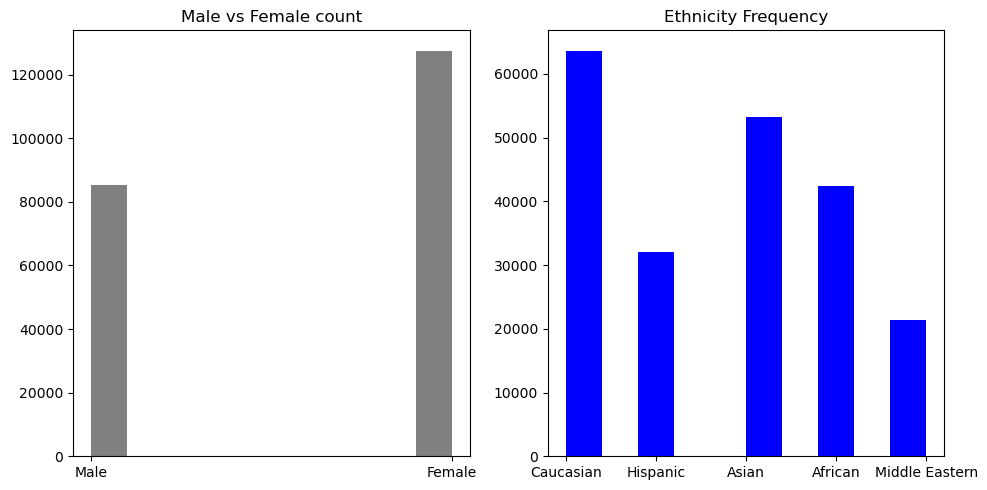

In [25]:
fig , axes = plt.subplots(nrows = 1, ncols = 2, figsize =(10,5))
axes[0].hist(data["Gender"], color = "grey")
axes[0].set_xticklabels(data["Gender"].unique())
axes[0].set_title("Male vs Female count")

axes[1].hist(data["Ethnicity"], color = "blue")
axes[1].set_xticklabels(data["Ethnicity"].unique())
axes[1].set_title("Ethnicity Frequency")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Spread of data')

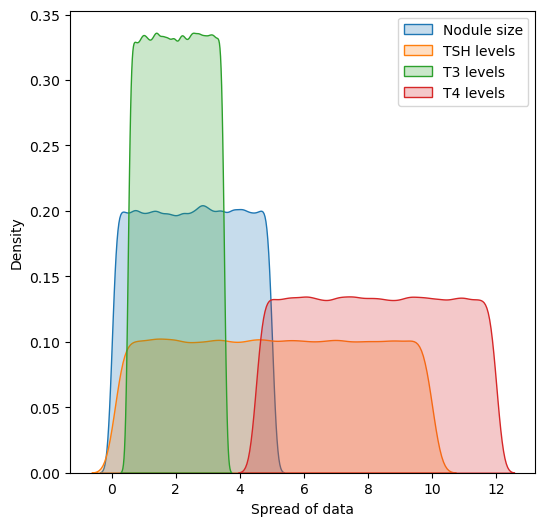

In [26]:
fig , ax1 = plt.subplots(figsize = (6,6))
sns.kdeplot(data= data["Nodule_Size"] , label = "Nodule size" , fill = True, ax=ax1)
sns.kdeplot(data= data["TSH_Level"] , label = "TSH levels" , fill = True, ax=ax1)
sns.kdeplot(data= data["T3_Level"] , label = "T3 levels" , fill = True, ax=ax1)
sns.kdeplot(data= data["T4_Level"] , label = "T4 levels" , fill = True, ax=ax1)
plt.legend()
ax1.set_xlabel("Spread of data")

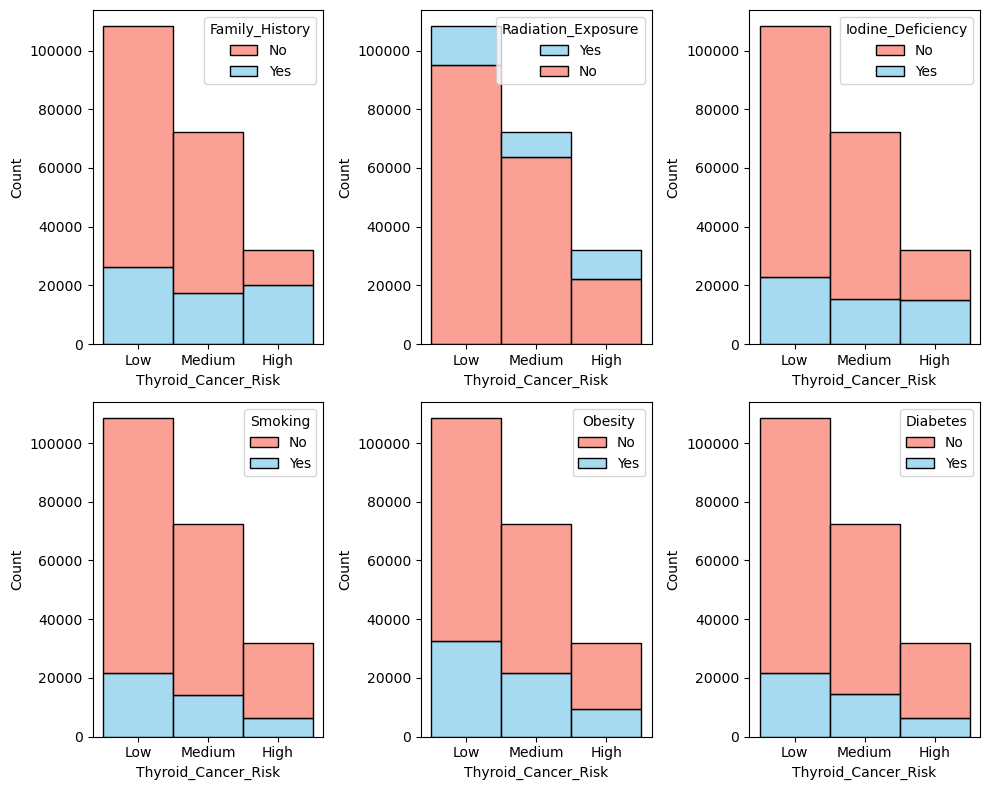

In [27]:
custom_colors = {"Yes": "skyblue", "No": "salmon"} 

fig , axe = plt.subplots(nrows = 2 , ncols = 3 , figsize = (10,8))

sns.histplot(x = data["Thyroid_Cancer_Risk"] , hue = data["Family_History"], palette=custom_colors , multiple="stack", ax = axe[0,0])
sns.histplot(x = data["Thyroid_Cancer_Risk"] , hue = data["Radiation_Exposure"], palette=custom_colors, multiple="stack" , ax = axe[0,1])
sns.histplot(x = data["Thyroid_Cancer_Risk"] , hue = data["Iodine_Deficiency"], palette=custom_colors, multiple="stack" , ax = axe[0,2])
sns.histplot(x = data["Thyroid_Cancer_Risk"] , hue = data["Smoking"], palette=custom_colors, multiple="stack" , ax = axe[1,0])
sns.histplot(x = data["Thyroid_Cancer_Risk"] , hue = data["Obesity"], palette=custom_colors, multiple="stack" , ax = axe[1,1])
sns.histplot(x = data["Thyroid_Cancer_Risk"] , hue = data["Diabetes"], palette=custom_colors, multiple="stack" , ax = axe[1,2])
plt.tight_layout()
plt.show()

## 4. Data Preprocessing 

In [28]:
data = pd.get_dummies(data , columns  = ['Country' , 'Ethnicity'] , drop_first = True)

In [29]:
cols = ['Country_China', 'Country_Germany', 'Country_India',
       'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern']
data[cols] = np.where(data[cols] == True ,1 ,0)

In [30]:
data

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1,66,Male,No,Yes,No,No,No,No,9.37,...,0,0,1,0,0,0,0,1,0,0
1,2,29,Male,No,Yes,No,No,No,No,1.83,...,0,0,0,0,0,0,0,0,1,0
2,3,86,Male,No,No,No,No,No,No,6.26,...,0,1,0,0,0,0,0,1,0,0
3,4,75,Female,No,No,No,No,No,No,4.10,...,0,0,0,0,0,0,1,0,0,0
4,5,35,Female,Yes,Yes,No,No,No,No,9.10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,No,No,No,No,Yes,No,2.00,...,0,0,0,0,0,0,1,0,0,0
212687,212688,89,Male,No,No,No,No,Yes,No,9.77,...,1,0,0,0,0,0,0,0,0,1
212688,212689,72,Female,No,No,No,No,No,Yes,7.72,...,0,1,0,0,0,0,0,0,1,0
212689,212690,85,Female,No,No,No,No,No,Yes,5.62,...,0,0,0,0,0,0,0,0,0,1


In [31]:
col_to_turn = ['Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes']
data[col_to_turn] = np.where(data[col_to_turn] == 'No' , 0, 1)

In [32]:
data['Gender'] = np.where(data['Gender'] == 'Male', 0,1)

In [33]:
data

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1,66,0,0,1,0,0,0,0,9.37,...,0,0,1,0,0,0,0,1,0,0
1,2,29,0,0,1,0,0,0,0,1.83,...,0,0,0,0,0,0,0,0,1,0
2,3,86,0,0,0,0,0,0,0,6.26,...,0,1,0,0,0,0,0,1,0,0
3,4,75,1,0,0,0,0,0,0,4.10,...,0,0,0,0,0,0,1,0,0,0
4,5,35,1,1,1,0,0,0,0,9.10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,1,0,0,0,0,1,0,2.00,...,0,0,0,0,0,0,1,0,0,0
212687,212688,89,0,0,0,0,0,1,0,9.77,...,1,0,0,0,0,0,0,0,0,1
212688,212689,72,1,0,0,0,0,0,1,7.72,...,0,1,0,0,0,0,0,0,1,0
212689,212690,85,1,0,0,0,0,0,1,5.62,...,0,0,0,0,0,0,0,0,0,1


In [34]:
data['Thyroid_Cancer_Risk'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [35]:
categories = [["Low", "Medium", "High"]]
OE = OrdinalEncoder(categories=categories)
data['Thyroid_Cancer_Risk'] = OE.fit_transform(data[['Thyroid_Cancer_Risk']])

In [36]:
data

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,1,66,0,0,1,0,0,0,0,9.37,...,0,0,1,0,0,0,0,1,0,0
1,2,29,0,0,1,0,0,0,0,1.83,...,0,0,0,0,0,0,0,0,1,0
2,3,86,0,0,0,0,0,0,0,6.26,...,0,1,0,0,0,0,0,1,0,0
3,4,75,1,0,0,0,0,0,0,4.10,...,0,0,0,0,0,0,1,0,0,0
4,5,35,1,1,1,0,0,0,0,9.10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,1,0,0,0,0,1,0,2.00,...,0,0,0,0,0,0,1,0,0,0
212687,212688,89,0,0,0,0,0,1,0,9.77,...,1,0,0,0,0,0,0,0,0,1
212688,212689,72,1,0,0,0,0,0,1,7.72,...,0,1,0,0,0,0,0,0,1,0
212689,212690,85,1,0,0,0,0,0,1,5.62,...,0,0,0,0,0,0,0,0,0,1


In [37]:
data["Diagnosis"].unique()

array(['Benign', 'Malignant'], dtype=object)

## 5. Descriptive  

In [38]:
X = data.drop(["Patient_ID" ,"Diagnosis"] , axis = 1)
Y = np.where(data["Diagnosis"] == "Benign" , 0, 1)

In [39]:
X = sm.add_constant(X)
model = sm.Logit(Y , X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.472818
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               212691
Model:                          Logit   Df Residuals:                   212664
Method:                           MLE   Df Model:                           26
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.1285
Time:                        19:51:59   Log-Likelihood:            -1.0056e+05
converged:                       True   LL-Null:                   -1.1539e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1258      0.040    -53.720      0.000      -2.203      -2.048
Age                         -0.0001      0.000     -0.571      0.568      -0.001       0.000
Gender                      -0.0032      0.011     -0.278      0.781      -0.025       0.019
Family_History               0.3162      0.012     25.897      0.000       0.292       0.340
Radiation_Exposure           0.2799      0.015     18.832      0.000       0.251       0.309
Iodine_Deficiency            0.2399      0.013     18.959      0.000       0.215       0.265
Smoking                      0.0068      0.014      0.489      0.625      -0.020       0.034
Obesity                     -0.0017      0.012     -0.136      0.891      -0.025       0.022
Diabetes                    -0.0202      0.014     -1.448      0.148      -0.048       0.007
TSH_Level                   -0.0036      0.002     -1.870      0.062      -0.007       0.000
T3_Level                    -0.0056      0.006     -0.870      0.384      -0.018       0.007
T4_Level                     0.0004      0.003      0.157      0.875      -0.005       0.005
Nodule_Size                 -0.0048      0.004     -1.239      0.216      -0.012       0.003
Thyroid_Cancer_Risk          0.9611      0.009    112.775      0.000       0.944       0.978
Country_China                0.0028      0.023      0.119      0.905      -0.043       0.048
Country_Germany              0.0178      0.031      0.568      0.570      -0.044       0.079
Country_India                0.2978      0.022     13.813      0.000       0.256       0.340
Country_Japan                0.0044      0.027      0.162      0.871      -0.049       0.058
Country_Nigeria              0.0180      0.023      0.774      0.439      -0.028       0.063
Country_Russia               0.0297      0.025      1.167      0.243      -0.020       0.079
Country_South Korea         -0.0175      0.028     -0.624      0.533      -0.073       0.038
Country_UK                   0.0197      0.031      0.631      0.528      -0.041       0.081
Country_USA                 -0.0400      0.032     -1.267      0.205      -0.102       0.022
Ethnicity_Asian              0.1843      0.016     11.548      0.000       0.153       0.216
Ethnicity_Caucasian         -0.2082      0.016    -12.677      0.000      -0.240      -0.176
Ethnicity_Hispanic          -0.2133      0.020    -10.850      0.000      -0.252      -0.175
Ethnicity_Middle Eastern    -0.2088      0.022     -9.335      0.000      -0.253      -0.165
============================================================================================
"""

In [40]:
model.pvalues[model.pvalues>0.05].index

Index(['Age', 'Gender', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
       'T3_Level', 'T4_Level', 'Nodule_Size', 'Country_China',
       'Country_Germany', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA'],
      dtype='object')

# 6 Predictive Model : logistic model


## 6.1 Logistic Model (BASE LINE MODEL)


In [41]:
X_train , X_test, y_train, y_test = train_test_split(X,Y , random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

C:\Users\Janit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
test_score = f1_score(y_pred , y_test)
train_score = f1_score(y_train_pred, y_train)

In [43]:
test_score, train_score, accuracy_score(y_pred, y_test)

(0.5385294117647059, 0.5473309373866597, 0.8229552592481146)

<Axes: >

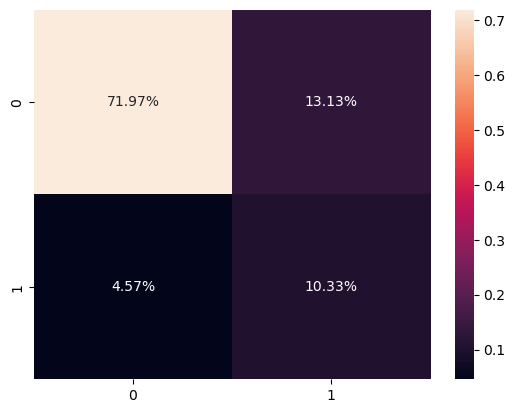

In [44]:
cm = confusion_matrix(y_pred , y_test)
sns.heatmap(cm/np.sum(cm),fmt='.2%',  annot=True)

## 6.2 Logistic model (Removal of p_values > 0.05)

In [45]:
columns_to_remove_p = model.pvalues[model.pvalues>0.05].index.to_list()

In [46]:
columns_to_remove_p

['Age',
 'Gender',
 'Smoking',
 'Obesity',
 'Diabetes',
 'TSH_Level',
 'T3_Level',
 'T4_Level',
 'Nodule_Size',
 'Country_China',
 'Country_Germany',
 'Country_Japan',
 'Country_Nigeria',
 'Country_Russia',
 'Country_South Korea',
 'Country_UK',
 'Country_USA']

In [47]:
X_with_p = X.drop(columns_to_remove_p, axis =1)

In [48]:
X_with_p.columns

Index(['const', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Thyroid_Cancer_Risk', 'Country_India', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic',
       'Ethnicity_Middle Eastern'],
      dtype='object')

In [49]:
X_train_p , X_test_p, y_train, y_test = train_test_split(X_with_p,Y , random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train_p, y_train)
y_train_pred_p = logreg.predict(X_train_p)
y_pred_p = logreg.predict(X_test_p)

test_score = f1_score(y_pred_p , y_test)
train_score = f1_score(y_train_pred_p, y_train)

test_score, train_score, accuracy_score(y_pred_p, y_test)

(0.542321585473006, 0.551090097189388, 0.8236699076599026)

# 7. Predictive Model : KNN 

## 7.1 KNN (BASE LINE MODEL w/ ELBOW METHOD)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


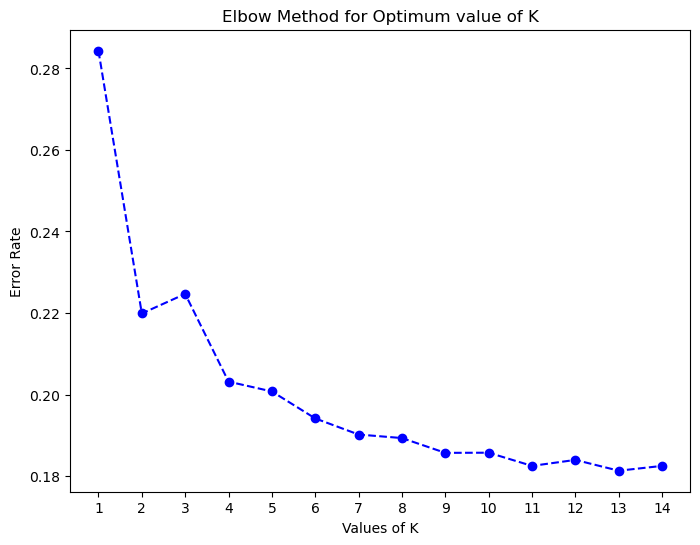

CPU times: total: 11min 51s
Wall time: 2min 28s


In [51]:
%%time 
error_rates = []
k_values = range(1,15)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled , y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize = (8,6))
plt.plot(k_values, error_rates, marker = 'o', linestyle = 'dashed', color = 'b')
plt.xlabel('Values of K')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimum value of K')
plt.xticks(range(1, 15))
plt.show()

In [52]:
## choosing K = 6
knn = KNeighborsClassifier(6)
knn.fit(X_train_scaled , y_train)
y_pred = knn.predict(X_test_scaled)
y_pred_train = knn.predict(X_train_scaled)

test_score = f1_score(y_pred, y_test)
train_score = f1_score(y_train_pred, y_train)

test_score, train_score, accuracy_score(y_pred, y_test)

(0.44669561022672455, 0.5473309373866597, 0.805860116976661)

## 7.2 KNN (Cross-validation, K = 6)

In [53]:
%%time
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
knn = KNeighborsClassifier(6)
pipeline = make_pipeline(StandardScaler(), knn)
cross_validate_results= cross_validate( pipeline, X, Y, cv=kf, scoring = 'f1', return_train_score = True )

CPU times: total: 18min 4s
Wall time: 3min 43s


In [54]:
cross_validate_results

{'fit_time': array([0.13635325, 0.13354468, 0.11905527, 0.12202501, 0.12812924]),
 'score_time': array([8.98079228, 8.92180586, 8.6878283 , 8.60958242, 9.05778813]),
 'test_score': array([0.44597236, 0.45118662, 0.45151639, 0.45456374, 0.44948676]),
 'train_score': array([0.52362901, 0.52147808, 0.52144059, 0.52056507, 0.52347588])}

In [55]:
print("Best Score for training data: ", max(cross_validate_results["train_score"]))
print("Best Score for test data", max(cross_validate_results["test_score"]))


Best Score for training data:  0.5236290118776852
Best Score for test data 0.4545637448863255


# 8. Predicition Model : Decision trees

### 8.1 Decision trees (BASE LINE MODEL)

In [56]:
dt = DecisionTreeClassifier(random_state = 42)

In [57]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_dt_pred = dt.predict(X_test)

In [59]:
y_dt_train_pred = dt.predict(X_train)

In [60]:
f1_score(y_dt_pred , y_test)

0.38432589718719695

In [61]:
f1_score(y_dt_train_pred, y_train)

1.0

### 8.2 Using max_depth && min_samples_leaf

#### ------------------------------------------------------------------------------
#### Calculating train and test scores with different values max_depth
#### ------------------------------------------------------------------------------


In [82]:
depth = dt.get_depth()
max_depth_list = list(range(depth,0,-3))
train_score_depth = {}
test_score_depth = {}
for depth in max_depth_list:
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    dt_model.fit(X_train, y_train)
    y_pred_train = dt_model.predict(X_train)
    y_pred = dt_model.predict(X_test)
    train_score_depth[depth] = f1_score(y_train, y_pred_train)
    test_score_depth[depth] = f1_score(y_test, y_pred)


In [93]:
Scoring_depth = pd.DataFrame()

In [94]:
Scoring_depth["Depth"] = train_score_depth.keys()
Scoring_depth["train_score"] = train_score_depth.values()
Scoring_depth["test_score"] = test_score_depth.values()

In [95]:
Scoring_depth

,Depth,train_score,test_score
0,64,1.000000,0.384326
1,61,0.999851,0.385090
2,58,0.999595,0.384966
3,55,0.999175,0.382301
4,52,0.998309,0.384759
5,49,0.996301,0.386810
6,46,0.992508,0.385594
7,43,0.986323,0.384779
8,40,0.977148,0.386328
9,37,0.962326,0.386632


In [189]:
## Choosing max_depth = 7

#### ------------------------------------------------------------------------------
#### Calculating train and test scores with different values min_samples_leaf
#### ------------------------------------------------------------------------------


In [120]:
samples_leaf =list(range(20,102,2))
samples_leaf
train_score_leaf = {}
test_score_leaf = {}
for leaf in samples_leaf:
    dt_model_leaf = DecisionTreeClassifier(min_samples_leaf = leaf, random_state = 42)
    dt_model_leaf.fit(X_train,y_train)
    y_pred_train = dt_model_leaf.predict(X_train)
    y_pred = dt_model_leaf.predict(X_test)
    train_score_leaf[leaf] = f1_score(y_train, y_pred_train)
    test_score_leaf[leaf] = f1_score(y_test, y_pred)
    

In [121]:
Scoring_leaf = pd.DataFrame()

In [122]:
Scoring_leaf["Leafs"] = train_score_leaf.keys()
Scoring_leaf["train_score"] = train_score_leaf.values()
Scoring_leaf["test_score"] = test_score_leaf.values()

In [123]:
Scoring_leaf

,Leafs,train_score,test_score
0,20,0.541361,0.460892
1,22,0.534733,0.466740
2,24,0.534728,0.476210
3,26,0.534861,0.481207
4,28,0.533567,0.485856
5,30,0.533102,0.487333
6,32,0.533170,0.491989
7,34,0.533988,0.494716
8,36,0.535289,0.499643
9,38,0.535525,0.499489


In [188]:
#### Choosing min_samples_leaf  = 90 , as the most stability of scores seems to be from 88 to 98

#### ------------------------------------------------------------------------------
#### Calculating train and test scores with min_samples_leaf = 90
#### ------------------------------------------------------------------------------


In [179]:
dt_tuned = DecisionTreeClassifier(min_samples_leaf = 90 , random_state = 42)
dt_tuned.fit(X_train , y_train)
dt_tuned_train = dt_tuned.predict(X_train)
dt_tuned_test = dt_tuned.predict(X_test)

print("F1 score of Train : ", f1_score(dt_tuned_train , y_train), "\nF1 score of Test: ", f1_score(dt_tuned_test, y_test) , "\nAccuracy Score : ", accuracy_score(dt_tuned_test, y_test))


F1 score of Train :  0.54844304947551 
F1 score of Test:  0.5364703570902304 
Accuracy Score :  0.8225227088936115


#### ------------------------------------------------------------------------------
#### Calculating train and test scores with max_depth = 7
#### ------------------------------------------------------------------------------


In [181]:
dt_tuned = DecisionTreeClassifier(max_depth = 7, random_state = 42)
dt_tuned.fit(X_train , y_train)
dt_tuned_train = dt_tuned.predict(X_train)
dt_tuned_test = dt_tuned.predict(X_test)

print("F1 score of Train : ", f1_score(dt_tuned_train , y_train), "\nF1 score of Test: ", f1_score(dt_tuned_test, y_test) , "\nAccuracy Score : ", accuracy_score(dt_tuned_test, y_test))

F1 score of Train :  0.5517513566847557 
F1 score of Test:  0.5397849462365591 
Accuracy Score :  0.82291764617381


#### ----------------------------------------------------------------------------------------------
#### Calculating train and test scores with max_depth = 7 and min_samples_leaf = 90
#### ----------------------------------------------------------------------------------------------


In [180]:
dt_tuned = DecisionTreeClassifier(max_depth = 7 , min_samples_leaf = 90 , random_state = 42)
dt_tuned.fit(X_train , y_train)
dt_tuned_train = dt_tuned.predict(X_train)
dt_tuned_test = dt_tuned.predict(X_test)

print("F1 score of Train : ", f1_score(dt_tuned_train , y_train), "\nF1 score of Test: ", f1_score(dt_tuned_test, y_test) , "\nAccuracy Score : ", accuracy_score(dt_tuned_test, y_test))


F1 score of Train :  0.551090097189388 
F1 score of Test:  0.542321585473006 
Accuracy Score :  0.8236699076599026


### 8.3 Using Adaboost

In [185]:
adamodel = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 7 , min_samples_leaf = 90 , random_state = 42) , random_state = 42)
adamodel.fit(X_train, y_train)


C:\Users\Janit\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         min_samples_leaf=90,
                                                         random_state=42),
                   random_state=42)

In [186]:
ada_y_pred = adamodel.predict(X_test)
ada_y_pred_train = adamodel.predict(X_train)

In [187]:
f1_score(ada_y_pred , y_test) , f1_score(y_train , ada_y_pred_train)

(0.4991005396761943, 0.5511866570368006)

### 8.4 Using GradientBoost

In [198]:
gbd = GradientBoostingClassifier(max_depth = 7 , min_samples_leaf = 90, random_state = 42)
gbd.fit(X_train, y_train)
gbd_y_pred = gbd.predict(X_test)
gbd_y_pred_train = gbd.predict(X_train)

f1_score(gbd_y_pred , y_test) , f1_score(y_train , gbd_y_pred_train)

(0.5419657243298667, 0.5512382578992313)

# 9. Results & Conclusion 

In [190]:
Results = pd.DataFrame()
Results["Model"] = ["Logistic Regression" , "Logistic Regression Tuned", "KNN", "KNN Tuned (CV)", "Decision Trees", "Decision Tree Tuned (max_depth)", "Decision Tree Tuned (min_samples_leaf)", "Decision Tree Tuned (both)", "Decision Tree Tuned (AdaBoost)"]
Results["Training Score"] = [0.54, 0.55, 0.54, 0.52, 1.0, 0.55, 0.54, 0.55, 0.49]
Results["Test Score"] = [0.53 , 0.54, 0.44, 0.45 , 0.38,  0.53, 0.53, 0.54, 0.55]

In [191]:
Results

,Model,Training Score,Test Score
0,Logistic Regression,0.54,0.53
1,Logistic Regression Tuned,0.55,0.54
2,KNN,0.54,0.44
3,KNN Tuned (CV),0.52,0.45
4,Decision Trees,1.00,0.38
5,Decision Tree Tuned (max_depth),0.55,0.53
6,Decision Tree Tuned (min_samples_leaf),0.54,0.53
7,Decision Tree Tuned (both),0.55,0.54
8,Decision Tree Tuned (AdaBoost),0.49,0.55


### Conclusion:  
### In terms of scoring, tuned Decision Tree model is the best option for classification of the feature "Diagnosis" with minimum overfitting in comparison to other models. In addition to this, tuned Logistic Regression model also reduced overfitting, however it has also eliminated crucial features of the dataset which eventually makes it inefficient.   
